In [2]:
import pandas as pd     
import numpy as np             
import matplotlib.pyplot as plt                       
import seaborn as sns             
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [3]:
df=pd.read_csv('stud.csv')
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [15]:
print(df['lunch'].unique())
print(df['test_preparation_course'].unique())
print(df['race_ethnicity'].unique())
print(df['parental_level_of_education'].unique())

['standard' 'free/reduced']
['none' 'completed']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [17]:
num_features=[features for features in df.columns if df[features].dtype!='O']
print(f"Total numerical features:{len(num_features)}")
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']
print(f"Total categorical features:{len(categorical_feature)}")

Total numerical features:3
Total categorical features:5


In [18]:
df['Total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['Total_score']/3
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [21]:
reading_full=df[df['reading_score']==100]['average'].count()
print(f"Number of students having full marks in reading:{reading_full}")
math_full=df[df['math_score']==100]['average'].count()
print(f"Number of students having full marks in maths:{math_full}")
writing_full=df[df['writing_score']==100]['average'].count()
print(f"Number of students having full marks in writing:{writing_full}")

Number of students having full marks in reading:17
Number of students having full marks in maths:7
Number of students having full marks in writing:14


In [22]:
reading_less_20=df[df['reading_score']<20]['average'].count()
print(f"Number of students having less than 20 marks in reading:{reading_less_20}")
math_less_20=df[df['math_score']<20]['average'].count()
print(f"Number of students having less than 20 marks in maths:{math_less_20}")
writing_less_20=df[df['writing_score']<20]['average'].count()
print(f"Number of students having less than 20 marks in writing:{writing_less_20}")

Number of students having less than 20 marks in reading:1
Number of students having less than 20 marks in maths:4
Number of students having less than 20 marks in writing:3


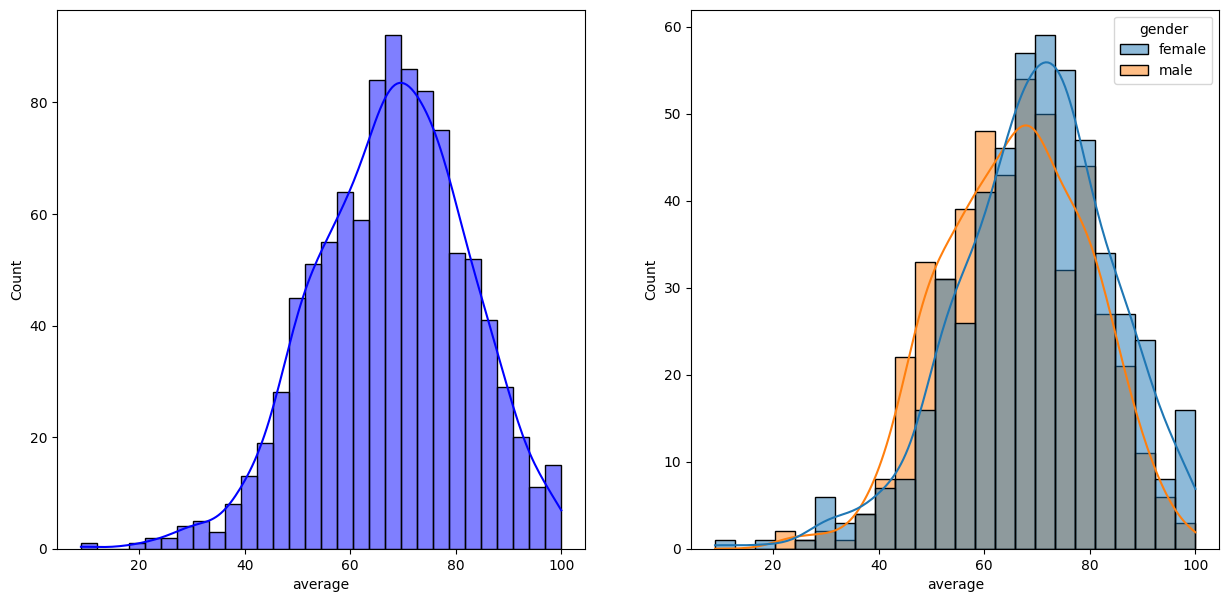

In [24]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='blue')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

<Axes: xlabel='average', ylabel='Count'>

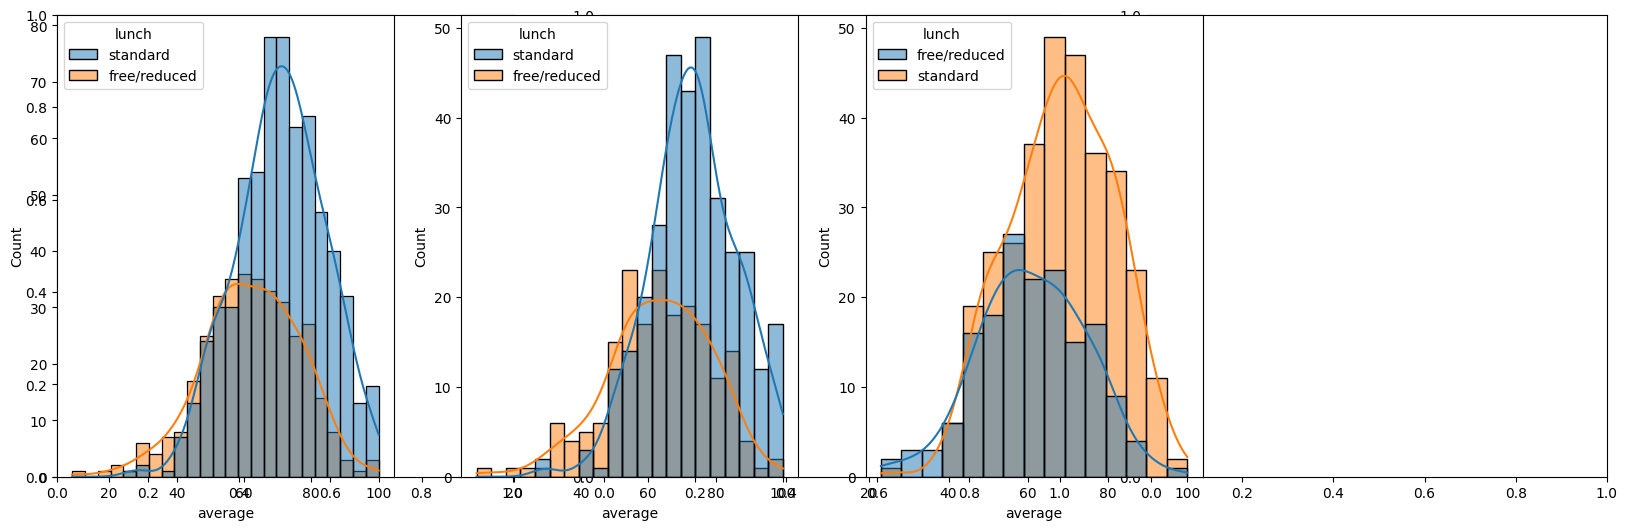

In [27]:
plt.subplots(1,3,figsize=(20,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')